# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD, as of some time in 2021. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [176]:
import pandas as pd
df = pd.read_csv("lumber-prices.csv")
df.dtypes

open     object
high     object
low      object
close    object
date     object
dtype: object

In [177]:
df.shape

(300, 5)

In [178]:
df.head(11)

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00
5,$401.90,$404.40,$370.10,$380.50,1997-05-01T00:00:00
6,$387.50,$393.10,$347.10,$378.00,1997-06-02T00:00:00
7,$380.60,$380.90,$332.00,$343.70,1997-07-01T00:00:00
8,$342.00,$365.90,$341.10,$356.70,1997-08-01T00:00:00
9,$356.70,$364.40,$290.50,$296.60,1997-09-02T00:00:00


## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [179]:
df.date.sort_values(ascending=True)
#December 1996 

0      1996-12-09T00:00:00
1      1997-01-02T00:00:00
2      1997-02-03T00:00:00
3      1997-03-03T00:00:00
4      1997-04-01T00:00:00
              ...         
295    2021-07-01T00:00:00
296    2021-08-02T00:00:00
297    2021-09-01T00:00:00
298    2021-10-01T00:00:00
299    2021-11-01T00:00:00
Name: date, Length: 300, dtype: object

## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [180]:
df.date.sort_values(ascending=False)
#November 2021 

299    2021-11-01T00:00:00
298    2021-10-01T00:00:00
297    2021-09-01T00:00:00
296    2021-08-02T00:00:00
295    2021-07-01T00:00:00
              ...         
4      1997-04-01T00:00:00
3      1997-03-03T00:00:00
2      1997-02-03T00:00:00
1      1997-01-02T00:00:00
0      1996-12-09T00:00:00
Name: date, Length: 300, dtype: object

In [181]:
df.high = df.high.str.replace("$","")
df.head(5)

/var/folders/x2/ld74q9c55_j9mn_p0hkl_0640000gn/T/ipykernel_46258/3654100637.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.high = df.high.str.replace("$","")


,open,high,low,close,date
0,$407.00,424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,417.50,$376.50,$403.10,1997-04-01T00:00:00


## What 3 months had the highest high lumber price?

In [182]:
df.open = df.open.str.replace("$","")
df.low = df.low.str.replace("$","")
df.close = df.close.str.replace("$","")

/var/folders/x2/ld74q9c55_j9mn_p0hkl_0640000gn/T/ipykernel_46258/397945881.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.open = df.open.str.replace("$","")
/var/folders/x2/ld74q9c55_j9mn_p0hkl_0640000gn/T/ipykernel_46258/397945881.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.low = df.low.str.replace("$","")
/var/folders/x2/ld74q9c55_j9mn_p0hkl_0640000gn/T/ipykernel_46258/397945881.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.close = df.close.str.replace("$","")


In [183]:
df.high=df.high.astype(float)


In [184]:
df.sort_values(by='high', ascending=False)
#May 2021, April 2021, June 2021 

,open,high,low,close,date
293,1520.60,1711.2,1201.00,1309.50,2021-05-03T00:00:00
292,1012.60,1502.3,1006.00,1500.50,2021-04-01T00:00:00
294,1315.00,1380.0,705.00,716.00,2021-06-01T00:00:00
291,1000.00,1045.0,826.30,1009.10,2021-03-01T00:00:00
290,887.00,1030.4,842.90,995.60,2021-02-01T00:00:00
...,...,...,...,...,...
148,172.40,189.1,159.30,161.00,2009-04-01T00:00:00
153,176.00,187.0,167.00,168.70,2009-09-01T00:00:00
147,144.60,179.8,138.00,171.30,2009-03-02T00:00:00
146,158.10,175.9,138.00,147.00,2009-02-02T00:00:00


## What 3 months had the lowest low lumber price?

In [185]:
df.low=df.low.astype(float)
df.sort_values(by='low', ascending=True)

#Jan 2009, Feb 2009, Mar 2009

,open,high,low,close,date
145,168.70,171.8,137.9,148.10,2009-01-02T00:00:00
146,158.10,175.9,138.0,147.00,2009-02-02T00:00:00
147,144.60,179.8,138.0,171.30,2009-03-02T00:00:00
149,160.00,201.2,150.7,191.70,2009-05-01T00:00:00
148,172.40,189.1,159.3,161.00,2009-04-01T00:00:00
...,...,...,...,...,...
294,1315.00,1380.0,705.0,716.00,2021-06-01T00:00:00
291,1000.00,1045.0,826.3,1009.10,2021-03-01T00:00:00
290,887.00,1030.4,842.9,995.60,2021-02-01T00:00:00
292,1012.60,1502.3,1006.0,1500.50,2021-04-01T00:00:00


## What is the median "high" lumber price in our dataset?

In [186]:
df.high.median()

329.65

## What is the median "low" lumber price in our dataset?

In [187]:
df.low.median()

286.1

In [188]:
df.date = df.date.str.replace("T00:00:00","")
df.head(1)

,open,high,low,close,date
0,407.00,424.7,377.0,424.70,1996-12-09


## Plot the maximum "high" lumber price on an annual basis.

In [231]:
df['year_datetime'] = pd.to_datetime(df.date, format="%Y-%m-%d",errors='coerce')
df.dtypes
df.head()
#df['year'] = pd.to_datetime(df.year_datetime, format="%Y-%m-%d",errors='coerce').dt.year
df['year'] = df.year_datetime.dt.year #gives me just the year of that datetime 
#df['year'] = df.year.astype('datetime64[ns]')
df.dtypes

open                    float64
high                    float64
low                     float64
close                   float64
date                     object
year_datetime    datetime64[ns]
year                      int64
swing                   float64
rose                    float64
dtype: object

<AxesSubplot: xlabel='year_datetime'>

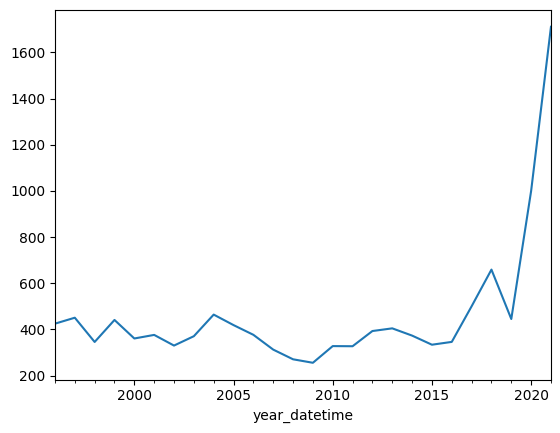

In [228]:
df.head()
df.resample('Y', on='year_datetime').high.max().plot()

#Why is this wrong? 

## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot: xlabel='year_datetime'>

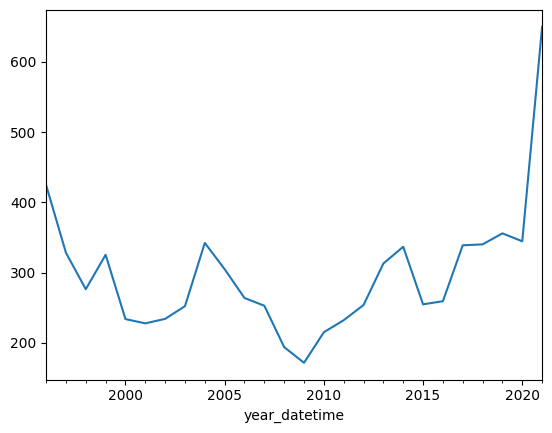

In [232]:
df.resample('Y', on='year_datetime').high.min().plot()

In [192]:
## Plot the median "close" lumber price on an quarterly basis.

<AxesSubplot: xlabel='year_datetime'>

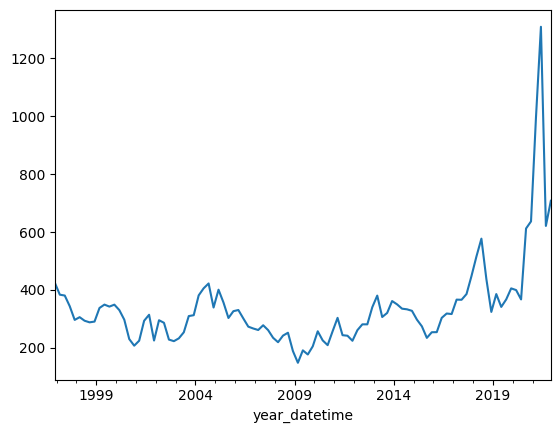

In [233]:
df.resample('3M', on='year_datetime').close.median().plot()

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [198]:
df['swing']=df.high-df.low
df.head()

,open,high,low,close,date,year_datetime,year,swing
0,407.00,424.7,377.0,424.70,1996-12-09,1996-12-09,1996,47.7
1,426.00,450.5,395.0,411.40,1997-01-02,1997-01-02,1997,55.5
2,408.50,421.5,382.1,383.50,1997-02-03,1997-02-03,1997,39.4
3,386.00,389.7,355.0,380.50,1997-03-03,1997-03-03,1997,34.7
4,378.00,417.5,376.5,403.10,1997-04-01,1997-04-01,1997,41.0


In [202]:
df.sort_values(by='swing', ascending=False)

#Jun 2021, May 2021, April 2021 

,open,high,low,close,date,year_datetime,year,swing
294,1315.00,1380.0,705.0,716.00,2021-06-01,2021-06-01,2021,675.0
293,1520.60,1711.2,1201.0,1309.50,2021-05-03,2021-05-03,2021,510.2
292,1012.60,1502.3,1006.0,1500.50,2021-04-01,2021-04-01,2021,496.3
285,931.00,1000.0,549.6,612.20,2020-09-01,2020-09-01,2020,450.4
284,595.00,934.5,584.1,928.00,2020-08-03,2020-08-03,2020,350.4
...,...,...,...,...,...,...,...,...
153,176.00,187.0,167.0,168.70,2009-09-01,2009-09-01,2009,20.0
181,249.80,254.0,234.6,248.20,2012-01-03,2012-01-03,2012,19.4
206,356.60,366.1,347.9,350.00,2014-02-03,2014-02-03,2014,18.2
216,326.60,342.3,326.0,331.10,2014-12-01,2014-12-01,2014,16.3


## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [203]:
df.open=df.open.astype(float)
df.close=df.close.astype(float)

In [209]:
df['rose']= df.close-df.open
df.head()
df[df.rose>0]

#145 months 

,open,high,low,close,date,year_datetime,year,swing,rose
0,407.0,424.7,377.0,424.7,1996-12-09,1996-12-09,1996,47.7,17.7
4,378.0,417.5,376.5,403.1,1997-04-01,1997-04-01,1997,41.0,25.1
8,342.0,365.9,341.1,356.7,1997-08-01,1997-08-01,1997,24.8,14.7
10,296.0,328.4,295.0,296.3,1997-10-01,1997-10-01,1997,33.4,0.3
11,299.0,330.0,291.0,325.0,1997-11-03,1997-11-03,1997,39.0,26.0
...,...,...,...,...,...,...,...,...,...
290,887.0,1030.4,842.9,995.6,2021-02-01,2021-02-01,2021,187.5,108.6
291,1000.0,1045.0,826.3,1009.1,2021-03-01,2021-03-01,2021,218.7,9.1
292,1012.6,1502.3,1006.0,1500.5,2021-04-01,2021-04-01,2021,496.3,487.9
297,482.1,659.7,454.4,627.5,2021-09-01,2021-09-01,2021,205.3,145.4


## How many months did lumber prices drop?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

In [212]:
df[df.rose<0]
#155 months 

,open,high,low,close,date,year_datetime,year,swing,rose
1,426.0,450.5,395.0,411.4,1997-01-02,1997-01-02,1997,55.5,-14.6
2,408.5,421.5,382.1,383.5,1997-02-03,1997-02-03,1997,39.4,-25.0
3,386.0,389.7,355.0,380.5,1997-03-03,1997-03-03,1997,34.7,-5.5
5,401.9,404.4,370.1,380.5,1997-05-01,1997-05-01,1997,34.3,-21.4
6,387.5,393.1,347.1,378.0,1997-06-02,1997-06-02,1997,46.0,-9.5
...,...,...,...,...,...,...,...,...,...
293,1520.6,1711.2,1201.0,1309.5,2021-05-03,2021-05-03,2021,510.2,-211.1
294,1315.0,1380.0,705.0,716.0,2021-06-01,2021-06-01,2021,675.0,-599.0
295,716.0,825.6,490.0,621.2,2021-07-01,2021-07-01,2021,335.6,-94.8
296,623.1,650.0,448.0,482.8,2021-08-02,2021-08-02,2021,202.0,-140.3


## In 2020, how many months saw lumber prices rise vs lumber prices fall?

In [216]:
df[(df.rose >0) & (df.year == '2020')]
#8 months in 2020 lumber prices rose

,open,high,low,close,date,year_datetime,year,swing,rose
277,404.0,444.4,387.3,435.5,2020-01-02,2020-01-02,2020,57.1,31.5
280,271.1,344.7,251.5,319.7,2020-04-01,2020-04-01,2020,93.2,48.6
281,320.0,378.5,320.0,367.1,2020-05-01,2020-05-01,2020,58.5,47.1
282,362.3,447.7,346.3,435.7,2020-06-01,2020-06-01,2020,101.4,73.4
283,439.0,600.0,435.1,585.8,2020-07-01,2020-07-01,2020,164.9,146.8
284,595.0,934.5,584.1,928.0,2020-08-03,2020-08-03,2020,350.4,333.0
287,498.5,648.0,495.0,636.8,2020-11-02,2020-11-02,2020,153.0,138.3
288,641.2,900.5,633.0,873.1,2020-12-01,2020-12-01,2020,267.5,231.9


In [217]:
df[(df.rose <0) & (df.year == '2020')]
#4 months in 2020 lumber prices fell 

,open,high,low,close,date,year_datetime,year,swing,rose
278,434.3,468.3,394.0,399.4,2020-02-03,2020-02-03,2020,74.3,-34.9
279,402.9,420.5,278.5,278.5,2020-03-02,2020-03-02,2020,142.0,-124.4
285,931.0,1000.0,549.6,612.2,2020-09-01,2020-09-01,2020,450.4,-318.8
286,620.2,629.5,490.8,495.6,2020-10-01,2020-10-01,2020,138.7,-124.6


## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [225]:
df[(df.rose >0) & (df.year == '2000')]
#2 months in 2000 lumber prices rose 

,open,high,low,close,date,year_datetime,year,swing,rose
45,222.0,250.3,212.1,230.1,2000-09-01,2000-09-01,2000,38.2,8.1
47,207.9,249.7,204.3,234.8,2000-11-01,2000-11-01,2000,45.4,26.9


In [219]:
df[(df.rose <0) & (df.year == '2000')]
#10 months in 2000 lumber prices fell

,open,high,low,close,date,year_datetime,year,swing,rose
37,352.0,359.8,323.2,346.6,2000-01-03,2000-01-03,2000,36.6,-5.4
38,345.5,360.5,329.5,330.2,2000-02-01,2000-02-01,2000,31.0,-15.3
39,335.0,342.8,317.0,324.7,2000-03-01,2000-03-01,2000,25.8,-10.3
40,326.0,329.5,292.2,299.5,2000-04-03,2000-04-03,2000,37.3,-26.5
41,301.0,303.0,272.6,297.0,2000-05-01,2000-05-01,2000,30.4,-4.0
42,295.9,308.3,268.0,275.5,2000-06-01,2000-06-01,2000,40.3,-20.4
43,263.0,267.0,235.0,250.0,2000-07-03,2000-07-03,2000,32.0,-13.0
44,248.1,249.8,213.2,221.8,2000-08-01,2000-08-01,2000,36.6,-26.3
46,231.5,234.0,202.2,207.2,2000-10-02,2000-10-02,2000,31.8,-24.3
48,233.3,237.9,202.1,205.5,2000-12-01,2000-12-01,2000,35.8,-27.8


In [223]:
df[(df.rose <0) & (df.year == '2000')].shape

(10, 9)